# **New Orlean's Slave Sales analysis**

##In this notebook Ill analyse a dataset of 15,377 slave sales from 1856 - 1861

# Importing libraries

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data opening

In [85]:
df = pd.read_csv('CalomirisPritchett_data.csv')
df

,ID number,Conveyance,Page,Researcher,Notary First Name,Notary Last Name,Sales Date,Sellers First Name,Sellers Last Name,Sellers County of Origin,...,Interest Rate,Discount Rate,predicted rate,Calculations,Ratio,PresentValue,DUMMY omission,Reason for Omission,Comments,DUMMY Estate Sale
0,1.0,70.0,348,MS,John French,Coffey,10/6/1856,Benjamin,Screws,.,...,NaN,0.00602698,0.07477,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1,2.0,70.0,349,MS,William,Shannon,10/7/1856,Santiago,Galseran,New Orleans,...,NaN,0.00602698,0.07477,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2,3.0,70.0,351,MS,Edward George,Gottschalk,10/1/1856,Pierre,Macou,New Orleans,...,NaN,0.00602698,0.07477,NaN,NaN,NaN,0.0,NaN,NaN,NaN
3,4.0,70.0,352,MS,Paul Emile,Laresche,10/8/1856,Benjamin Franklin,Irby,Vanzand,...,NaN,0.00602698,0.07477,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4,5.0,70.0,352,MS,George,Rareshide,10/8/1856,Richard,Condon,New Orleans,...,NaN,0.00602698,0.07477,NaN,NaN,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Data description
##Sales Date - Sales date of transaction (MM/DD/YYYY format). This is NOT the date the sale was recorded in conveyance office.
##Sex Male (M) or female (F). - Gender often inferred from sale record, such as Negro vs. Negress, mulatto vs. mulattress, etc.
##Age - Age in years
##Color - Description of slave’s skin color, but may also indicate ancestry (such as mulatto)
##Price - Price associated with slaves. For group sales with a single price, only one price is listed for first slave, and for other slaves, entry is blank

In [226]:
#Select useful columns

df = df[['Sales Date', 'Sex', 'Age', 'Color', 'Price']]
df.head(15)

,Sales Date,Sex,Age,Color,Price
13331,4/30/1829,F,9.000000,Negro,225.0
77,5/15/1837,M,47.000000,Negro,250.0
75,5/15/1837,F,39.000000,Negro,300.0
10293,3/7/1846,F,29.000000,Negro,300.0
4044,10/5/1847,F,26.000000,Negro,550.0
5381,6/22/1849,F,1.166667,Griff,20.0
2985,5/1/1852,M,20.000000,Negro,900.0
544,11/12/1853,F,30.000000,Negro,1040.0
3556,12/9/1853,M,29.000000,Negro,1375.0
3031,1/4/1854,M,30.000000,Negro,1000.0


#Sorting data by date

In [136]:
df['Date'] = pd.to_datetime(df['Sales Date'], format='%m/%d/%Y', errors='coerce') #if wrong date format, delete the row
df = df.sort_values(by='Date')
df

<ipython-input-136-d0cf976f8606>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Sales Date'], format='%m/%d/%Y', errors='coerce') #if wrong date format, delete the row


,Sales Date,Sex,Age,Color,Price,Date
13331,4/30/1829,F,9.0,Negro,225.0,1829-04-30
77,5/15/1837,M,47.0,Negro,250.0,1837-05-15
75,5/15/1837,F,39.0,Negro,300.0,1837-05-15
10293,3/7/1846,F,29.0,Negro,300.0,1846-03-07
4044,10/5/1847,F,26.0,Negro,550.0,1847-10-05
...,...,...,...,...,...,...
14702,8/29/1861,M,28.0,Creole Negro,800.0,1861-08-29
14696,8/29/1861,F,52.0,Griff,80.0,1861-08-29
14613,8/29/1861,M,26.0,Creole Negro,900.0,1861-08-29
14615,8/30/1861,F,26.0,Negro,1150.0,1861-08-30


#Data cleanup
The key data is Price, so we should delete rows with NaN values. The same with the Age and Sex and Date
. is the NaN too



In [205]:
df['Price'].replace('.', pd.NA, inplace=True)
df['Sex'].replace('.', pd.NA, inplace=True)
df['Color'].replace('.', pd.NA, inplace=True)
df['Sales Date'].replace('.', pd.NA, inplace=True)

df = df.dropna(subset=['Price', 'Sex', 'Age', 'Date'])
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df

,Sales Date,Sex,Age,Color,Price,Date,Year,Gender_Code,Sex_Code,Color_Code,Age_Group
13331,4/30/1829,F,9.0,Negro,225.0,1829-04-30,1829,0.0,0,0.0,"[5, 10)"
77,5/15/1837,M,47.0,Negro,250.0,1837-05-15,1837,1.0,1,0.0,"[45, 50)"
75,5/15/1837,F,39.0,Negro,300.0,1837-05-15,1837,0.0,0,0.0,"[35, 40)"
10293,3/7/1846,F,29.0,Negro,300.0,1846-03-07,1846,0.0,0,0.0,"[25, 30)"
4044,10/5/1847,F,26.0,Negro,550.0,1847-10-05,1847,0.0,0,0.0,"[25, 30)"
...,...,...,...,...,...,...,...,...,...,...,...
14614,8/28/1861,F,43.0,Negro,700.0,1861-08-28,1861,0.0,0,0.0,"[40, 45)"
14695,8/28/1861,M,10.0,Negro,400.0,1861-08-28,1861,1.0,1,0.0,"[10, 15)"
14696,8/29/1861,F,52.0,Griff,80.0,1861-08-29,1861,0.0,0,2.0,"[50, 55)"
14615,8/30/1861,F,26.0,Negro,1150.0,1861-08-30,1861,0.0,0,0.0,"[25, 30)"


#Data Overview

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12003 entries, 13331 to 13978
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Sales Date  12003 non-null  object        
 1   Sex         12003 non-null  object        
 2   Age         12003 non-null  float64       
 3   Color       10845 non-null  object        
 4   Price       12003 non-null  float64       
 5   Date        12003 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 656.4+ KB


In [139]:
df.describe()

,Age,Price
count,12003.000000,12003.000000
mean,25.995055,1311.484365
std,11.049083,2160.788914
min,0.000000,0.000000
25%,18.000000,825.000000
50%,23.000000,1200.000000
75%,32.500000,1500.000000
max,80.000000,96500.000000


##Date analysis

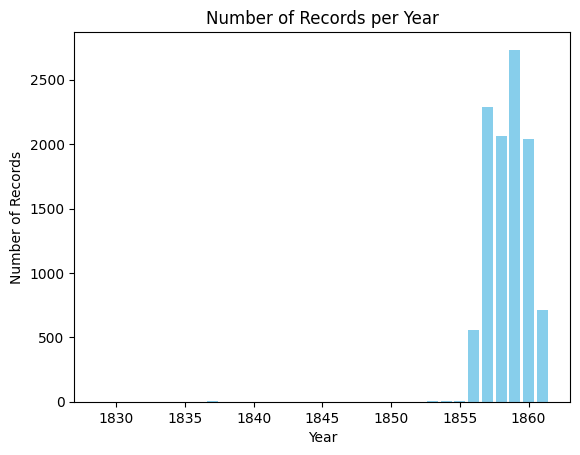

In [204]:
df['Year'] = df['Date'].dt.year

# Count the number of records for each year
yearly_counts = df['Year'].value_counts().sort_index()

# Create a bar graph
plt.bar(yearly_counts.index, yearly_counts.values, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Records')
plt.title('Number of Records per Year')
plt.show()

Data has wrong years so we should analyse data from 1856-1865

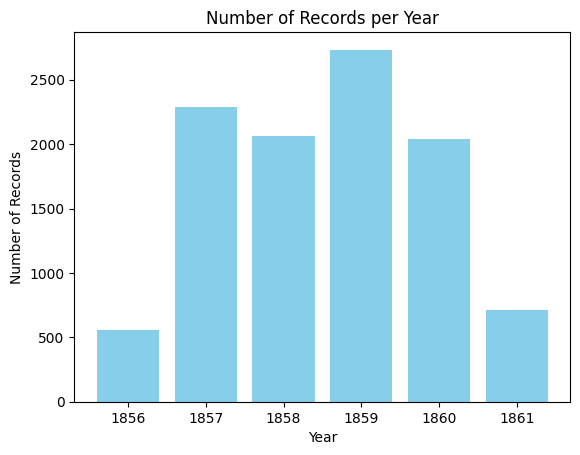

In [203]:
#we should analyse data from 1856-1865
yearly_counts = dict(df['Year'].value_counts().sort_index())
yearly_counts = pd.Series({i: yearly_counts[i] for i in yearly_counts if int(i) >= 1856 and int(i) <= 1865})

# Create a bar graph
plt.bar(yearly_counts.index, yearly_counts.values, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Records')
plt.title('Number of Records per Year')
plt.show()

##Price analysis

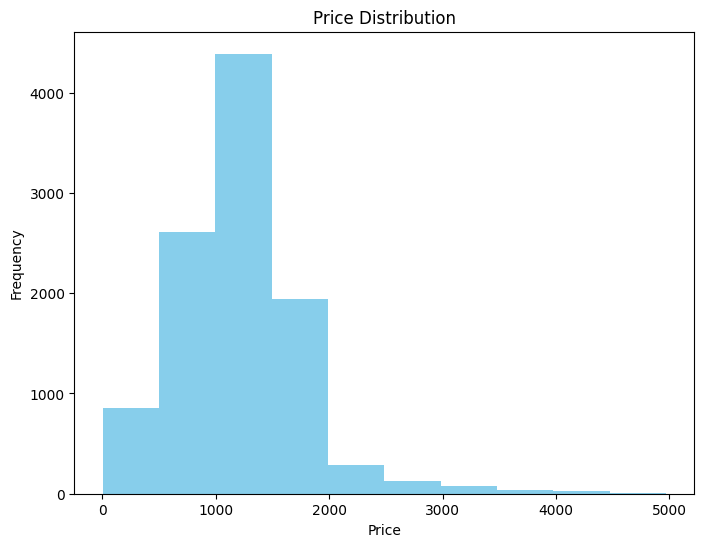

In [225]:
plt.figure(figsize=(8, 6))
plt.hist(df[df['Price'] < 5000]['Price'], bins=10, color='skyblue') # To avoid data outliers
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.show()

In [148]:
df['Price'].describe()

count    12003.000000
mean      1311.484365
std       2160.788914
min          0.000000
25%        825.000000
50%       1200.000000
75%       1500.000000
max      96500.000000
Name: Price, dtype: float64

In [144]:
df['Price'].median()

1200.0

So mean price is 1311, standart deviation is 2160, median is 1200

##Age distribution

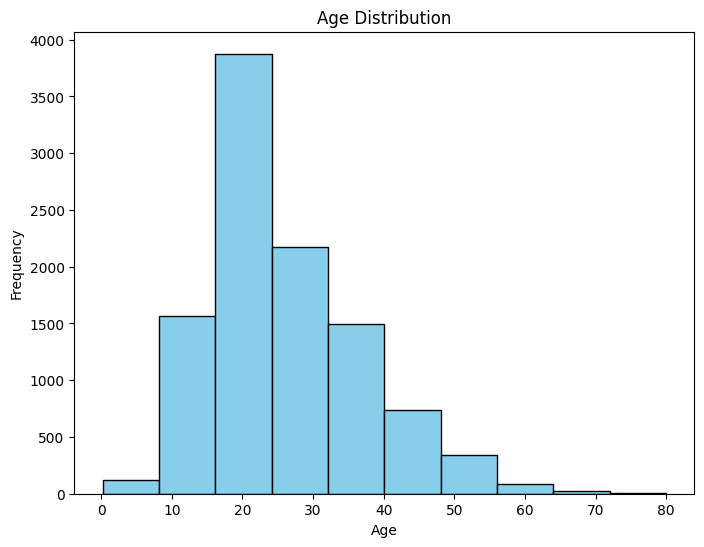

In [200]:
plt.figure(figsize=(8, 6))
plt.hist(df['Age'], bins=10, edgecolor='k', color='skyblue') # To avoid data outliers
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

From this bar plot its obvious that age 20 is the most popular

In [149]:
df['Age'].describe()

count    12003.000000
mean        25.995055
std         11.049083
min          0.000000
25%         18.000000
50%         23.000000
75%         32.500000
max         80.000000
Name: Age, dtype: float64

In [151]:
df['Age'].median()

23.0

So the mean age is 26, standart deviation is 11, median price is 23

#Sex and color distribution

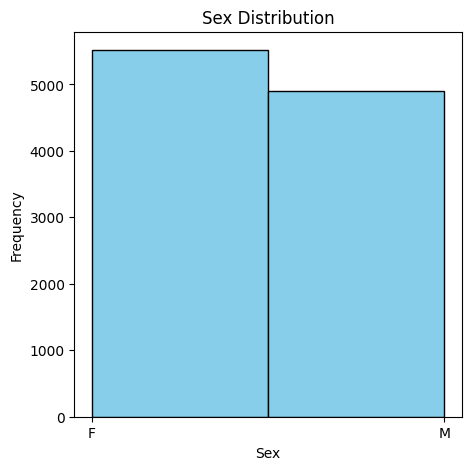

In [199]:
plt.figure(figsize=(5, 5))
plt.hist(df[df['Sex'].isin(['F', 'M'])]['Sex'], bins=2, edgecolor='k', color='skyblue') # To avoid data outliers
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.title('Sex Distribution')
plt.show()

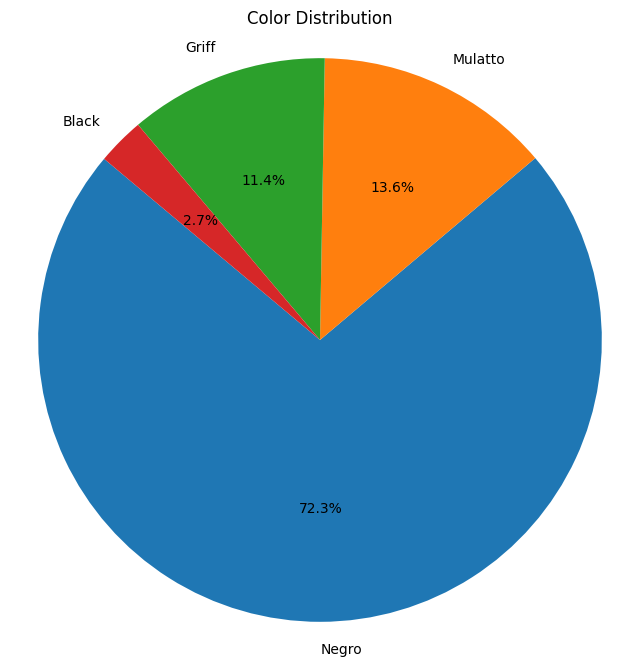

In [198]:
color_counts = df['Color'].value_counts()

total_count = len(df)
percentage_threshold = 1
color_counts = color_counts[color_counts / total_count * 100 >= percentage_threshold]

plt.figure(figsize=(8, 8))
plt.pie(color_counts, labels=color_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Color Distribution')
plt.axis('equal')
plt.show()

#Data transformation

In [154]:
df['Sex_Code'] = df['Sex'].map({'F': 0, 'M': 1})
df = df[df['Sex'].isin(['F', 'M'])]

df['Color_Code'] = df['Color'].map({'Negro': 0, 'Mulatto': 1,'Griff': 2, 'Black': 3})
df = df[df['Color'].isin(['Negro', 'Mulatto', 'Griff', 'Black'])]
df

<ipython-input-154-8b6ee2a189f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex_Code'] = df['Sex'].map({'F': 0, 'M': 1})


,Sales Date,Sex,Age,Color,Price,Date,Year,Gender_Code,Sex_Code,Color_Code
13331,4/30/1829,F,9.0,Negro,225.0,1829-04-30,1829,0.0,0,0.0
77,5/15/1837,M,47.0,Negro,250.0,1837-05-15,1837,1.0,1,0.0
75,5/15/1837,F,39.0,Negro,300.0,1837-05-15,1837,0.0,0,0.0
10293,3/7/1846,F,29.0,Negro,300.0,1846-03-07,1846,0.0,0,0.0
4044,10/5/1847,F,26.0,Negro,550.0,1847-10-05,1847,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...
14614,8/28/1861,F,43.0,Negro,700.0,1861-08-28,1861,0.0,0,0.0
14695,8/28/1861,M,10.0,Negro,400.0,1861-08-28,1861,1.0,1,0.0
14696,8/29/1861,F,52.0,Griff,80.0,1861-08-29,1861,0.0,0,2.0
14615,8/30/1861,F,26.0,Negro,1150.0,1861-08-30,1861,0.0,0,0.0


#Detailed overview
Here Ill calculate annual statistics and statistics for each color of skin

In [159]:
#annual statistics

cut_df = df[(df['Year'] >= 1856) & (df['Year'] <= 1861)]


annual_stat = {}
for year in range(1856, 1862):
    annual_stat[year] = cut_df[cut_df['Year'] == year].describe()

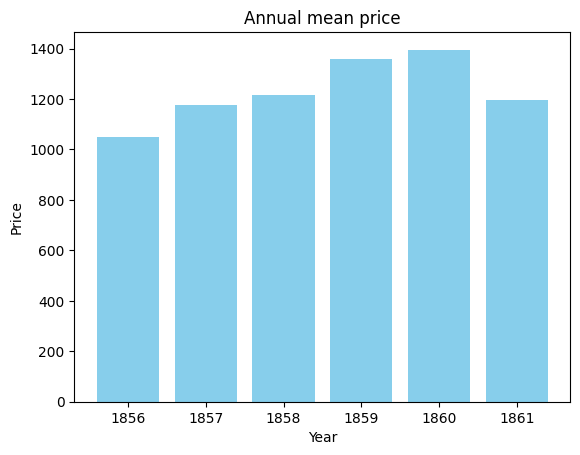

In [196]:
plt.bar(range(1856, 1862), [annual_stat[i]['Price']['mean'] for i in annual_stat], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Annual mean price')
plt.show()

We can see gradual growth of mean price from 1856 until 1860 and then a drop

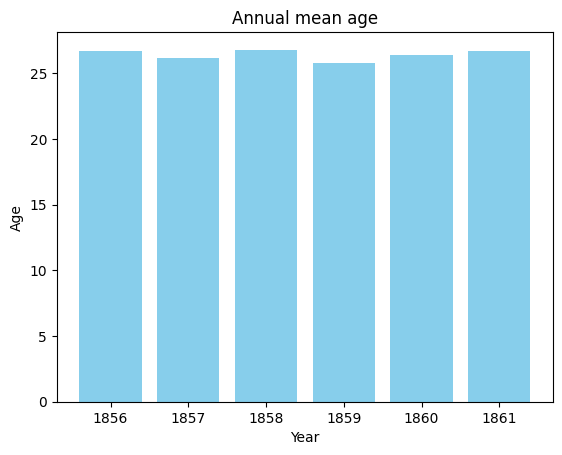

In [195]:
plt.bar(range(1856, 1862), [annual_stat[i]['Age']['mean'] for i in annual_stat], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Age')
plt.title('Annual mean age')
plt.show()

Mean age of slaves doesnt change, just a little fluctuations

In [184]:
#skin color statistics
color_stat = {}

for color in ['Negro', 'Mulatto', 'Griff', 'Black']:
    color_group = df[df['Color'] == color]
    if not color_group.empty:
        color_stat[color] = color_group.describe()

color_stat = pd.DataFrame({color: [color_stat[color]['Price']['mean'], color_stat[color]['Age']['mean']] for color in ['Negro', 'Mulatto', 'Griff', 'Black']})
color_stat = color_stat.rename(index={0: 'Price', 1: 'Age'})

In [185]:
color_stat

,Negro,Mulatto,Griff,Black
Price,1289.043630,1182.913627,1190.460747,1462.690813
Age,26.985299,24.672385,24.429393,24.098940


The most valueable color is Black, the mean age is 24-26 for each skin color

#Hypothesis checking
My hypothesis is "Is correlation and distribution between age and price the same for Male and Female?"

In [189]:
male_df = df[df['Sex'] == 'M']
female_df = df[df['Sex'] == 'F']

In [208]:
male_df

,Sales Date,Sex,Age,Color,Price,Date,Year,Gender_Code,Sex_Code,Color_Code
77,5/15/1837,M,47.0,Negro,250.0,1837-05-15,1837,1.0,1,0.0
2985,5/1/1852,M,20.0,Negro,900.0,1852-05-01,1852,1.0,1,0.0
3556,12/9/1853,M,29.0,Negro,1375.0,1853-12-09,1853,1.0,1,0.0
3031,1/4/1854,M,30.0,Negro,1000.0,1854-01-04,1854,1.0,1,0.0
13948,11/9/1854,M,28.0,Negro,1100.0,1854-11-09,1854,1.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...
14611,8/19/1861,M,60.0,Negro,350.0,1861-08-19,1861,1.0,1,0.0
14609,8/23/1861,M,17.0,Mulatto,700.0,1861-08-23,1861,1.0,1,1.0
14694,8/27/1861,M,40.0,Negro,550.0,1861-08-27,1861,1.0,1,0.0
14695,8/28/1861,M,10.0,Negro,400.0,1861-08-28,1861,1.0,1,0.0


In [211]:
female_df

,Sales Date,Sex,Age,Color,Price,Date,Year,Gender_Code,Sex_Code,Color_Code
13331,4/30/1829,F,9.000000,Negro,225.0,1829-04-30,1829,0.0,0,0.0
75,5/15/1837,F,39.000000,Negro,300.0,1837-05-15,1837,0.0,0,0.0
10293,3/7/1846,F,29.000000,Negro,300.0,1846-03-07,1846,0.0,0,0.0
4044,10/5/1847,F,26.000000,Negro,550.0,1847-10-05,1847,0.0,0,0.0
5381,6/22/1849,F,1.166667,Griff,20.0,1849-06-22,1849,0.0,0,2.0
...,...,...,...,...,...,...,...,...,...,...
14608,8/22/1861,F,14.000000,Negro,1000.0,1861-08-22,1861,0.0,0,0.0
14616,8/24/1861,F,45.000000,Negro,500.0,1861-08-24,1861,0.0,0,0.0
14614,8/28/1861,F,43.000000,Negro,700.0,1861-08-28,1861,0.0,0,0.0
14696,8/29/1861,F,52.000000,Griff,80.0,1861-08-29,1861,0.0,0,2.0


Firstly lets show mean price for each age group

<ipython-input-215-9a23e3f4f26d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_df['Age_Group'] = pd.cut(female_df['Age'], bins=age_bins, right=False)


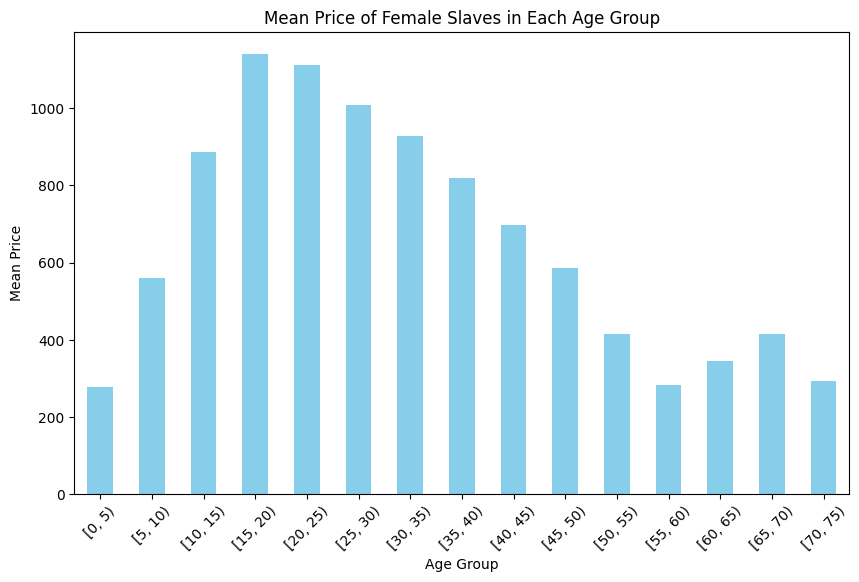

In [215]:
age_bins = range(0, int(female_df['Age'].max()) + 5, 5)


female_df['Age_Group'] = pd.cut(female_df['Age'], bins=age_bins, right=False)


age_group_mean_price = female_df[female_df['Price'] < 1500].groupby('Age_Group')['Price'].mean()


plt.figure(figsize=(10, 6))
age_group_mean_price.plot(kind='bar', color='skyblue')
plt.title('Mean Price of Female Slaves in Each Age Group')
plt.xlabel('Age Group')
plt.ylabel('Mean Price')
plt.xticks(rotation=45)
plt.show()

<ipython-input-213-29a4ff9cd513>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_df['Age_Group'] = pd.cut(male_df['Age'], bins=age_bins, right=False)


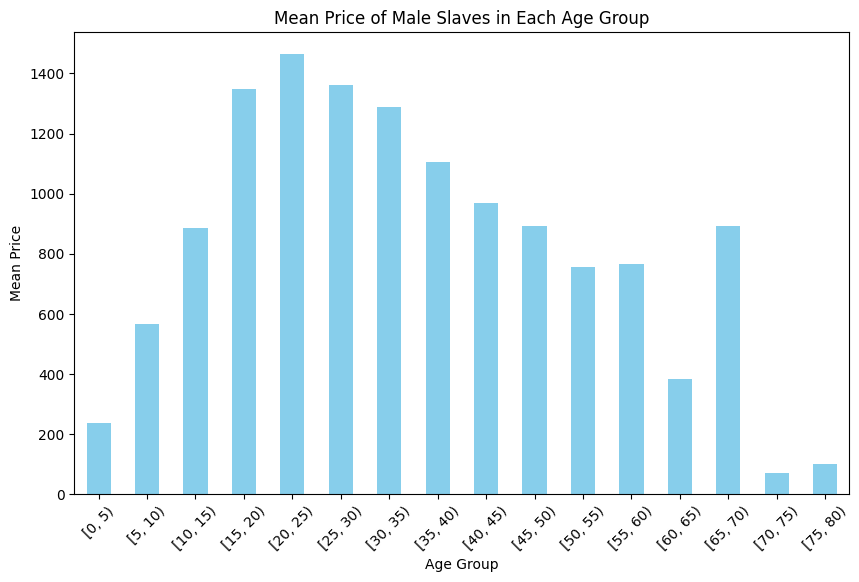

In [213]:
age_bins = range(0, int(male_df['Age'].max()) + 5, 5)


male_df['Age_Group'] = pd.cut(male_df['Age'], bins=age_bins, right=False)


age_group_mean_price = male_df[male_df['Price'] < 5000].groupby('Age_Group')['Price'].mean()


plt.figure(figsize=(10, 6))
age_group_mean_price.plot(kind='bar', color='skyblue')
plt.title('Mean Price of Male Slaves in Each Age Group')
plt.xlabel('Age Group')
plt.ylabel('Mean Price')
plt.xticks(rotation=45)
plt.show()

We can see that distributions of males and females are similar. The most valuable group for females is 15-20 and for males is 20-25

Now lets calculate the correlation

In [216]:
correlation_female = female_df['Age'].corr(female_df['Price'])
correlation_male = male_df['Age'].corr(male_df['Price'])

print(f'Correlation between Age and Price for Female slaves: {correlation_female}')
print(f'Correlation between Age and Price for Male slaves: {correlation_male}')

Correlation between Age and Price for Female slaves: -0.03843623660893843
Correlation between Age and Price for Male slaves: 0.009716509217238609


As we can see, there is no correlation for male and female, but lets calculate it for 0-20 and 20-80 age periods

In [224]:
male_df_age_0_20 = male_df[(male_df['Age'] >= 0) & (male_df['Age'] <= 20)]
male_df_age_20_80 = male_df[(male_df['Age'] > 20) & (male_df['Age'] <= 80)]

# Calculate the correlation for each subset
male_correlation_0_20 = male_df_age_0_20['Age'].corr(male_df_age_0_20['Price'])
male_correlation_20_80 = male_df_age_20_80['Age'].corr(male_df_age_20_80['Price'])

female_df_age_0_20 = female_df[(female_df['Age'] >= 0) & (female_df['Age'] <= 20)]
female_df_age_20_80 = female_df[(female_df['Age'] > 20) & (female_df['Age'] <= 80)]

# Calculate the correlation for each subset
female_correlation_0_20 = female_df_age_0_20['Age'].corr(female_df_age_0_20['Price'])
female_correlation_20_80 = female_df_age_20_80['Age'].corr(female_df_age_20_80['Price'])

print(f'Correlation between Age (0-20) and Price for Males: {male_correlation_0_20}')
print(f'Correlation between Age (20-80) and Price for Males: {male_correlation_20_80}')

print(f'Correlation between Age (0-20) and Price for Females: {female_correlation_0_20}')
print(f'Correlation between Age (20-80) and Price for Females: {female_correlation_20_80}')

Correlation between Age (0-20) and Price for Males: 0.23011115587849745
Correlation between Age (20-80) and Price for Males: -0.056937436085141124
Correlation between Age (0-20) and Price for Females: 0.30705968430228797
Correlation between Age (20-80) and Price for Females: -0.0854492961096944


Here we can see correlation between age and price for 0-20 age groups, but they are different for males and females. For females age is more important.

Distributions are the same, but correlations are not, so hypothesis is false.